# Logistic Regression Modeling

## Objectives
* Load data
* Tune hyper parameters for each version of the data
* Select a model
* Examine results
* Save results

## Tools Used
* Pickle
* Numpy
* Pandas
* Matplotlib
* Sklearn
* Imblearn

#### Load data

I will start by importing the necessary libraries.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, precision_recall_curve, auc, precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit
import time
from modeling_functions import *

import warnings
warnings.filterwarnings("ignore") 

## Pickle

In [2]:
# Load data
pickle_in = open("engineered_data.pickle", "rb")
df = pickle.load(pickle_in)
pickle_in.close()

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df)


# combine train, val and test data
X = pd.concat([X_train, X_val, X_test], axis=0)
y = pd.concat([y_train, y_val, y_test], axis=0)


(14275, 53) (42721, 53) (42722, 53) (14275,) (42721,) (42722,)


In [3]:
# Load data
pickle_in = open("olr_keys_n_components.pickle", "rb")
olr_keys_n_components = list(pickle.load(pickle_in))
pickle_in.close()

# Sanity Check
print(olr_keys_n_components)

[('s1_r1_o1', 19), ('s1_r1_o3', 18), ('s1_r2_o1', 17), ('s1_r2_o3', 16), ('s2_r1_o1', 26), ('s2_r1_o3', 26), ('s2_r2_o1', 21), ('s2_r2_o3', 22), ('s3_r1_o1', 23), ('s3_r1_o3', 25), ('s3_r2_o1', 17), ('s3_r2_o3', 20)]


## Tune hyperparameters

My goal for this project is to create a model that can help alert a credit lender to suspicious activity. <br><br>

For this reason I want to have low false negatives, so I will be using recall as my main metric. High recall will mean a low amount of fradulent transactions are left undetected. <br><br>

My second metric will be precision because I do not want false positives either. low precision would cause the model to flag too large an amount of the data as likely to be fraudulent. If the credit lender chose to take preventative action on say, every other transaction, then that would be a nuisance to both the credit lender and the clients. <br><br>

However precision does not need to be nearly as high as recall. If recall was say %80 then I would have potentially stopped %80 percent of fraud and if precision was say %20 then less than 1 out of 100 transactions would be flagged as suspicous to fraud, because in this dataset fraud accounts for %0.17 percent of the data I was  given. <br><br> 

F1-score is the harmonic mean of recall and precision. It is not the best metric to use though because it is important that recall is high, but precision can get away with being much lower.<br><br>

The metrics mentioned above are calculated by comparing the known values to the model's predicted values. The simplified formulas for precision and recall are showed below. 
<img src="../Images/Precision_Recall.png"><br>
<a href="https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9">Image Source</a> 
<br><br>

To tune the hyperparameters I will use my own function called customGridSearch. It has a doc string attached. The function will go through the data transforming it according to the function's parameters and return the cross validation scores for each method as well as for the best combination of parameters.

## LogisticRegression

In [5]:
# Instantiate logistic regression classifer
clf = LogisticRegression()

# Create parameter grid
params = { 
    'C': [0.1, 1, 10, 100]
}

Warning the following cell 5 took minutes to run!

In [6]:
# Tune hyperparameters for all scalers 
# Implementing SMOTE
# No outliers removed
# No PCA

t1 = time.time()

# Record results
results_o1 = {}
scaler_str = ["Min-Max", "Standard", "Robust"]
for n, scaler in enumerate([MinMaxScaler(), StandardScaler(), RobustScaler()]):
    print(scaler_str[n], '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    results_o1[scaler_str[n]] = customGridSearchCV(clf, params, X_train, y_train, "f1", scaler, SMOTE())
    
t2 = time.time()

print((t2 - t1)/60)

Min-Max ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.8750213128729752 
 precision: 0.7867899067128847 
 f1-score: 0.8280091533262617 
precision-recall auc: 0.8865608070586735 

Standard ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.8982523444160273 
 precision: 0.4820032875057826 
 f1-score: 0.6264944565514112 
precision-recall auc: 0.8853058634962251 

Robust ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.8982523444160273 
 precision: 0.47655802256288193 
 f1-score: 0.622222391182054 
precision-recall auc: 0.89162182861962 

0.4567742904027303


Warning: The following cell took 4 minutes to run!

In [7]:
# Tune hyperparameters for all scalers 
# Implementing SMOTE
# outliers removed
# No PCA

t1 = time.time()

# Record results
results_o3 = {}
scaler_str = ["Min-Max", "Standard", "Robust"]
for n, scaler in enumerate([MinMaxScaler(), StandardScaler(), RobustScaler()]):
    print(scaler_str[n], '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    results_o3[scaler_str[n]] = customGridSearchCV(clf, params, X_train, y_train, "f1", scaler, SMOTE(), outlier_removal=True)
    
t2 = time.time()

print((t2 - t1)/60)

Min-Max ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.8692242114236999 
 precision: 0.7135323562075788 
 f1-score: 0.7785583980420229 
precision-recall auc: 0.882131763297331 

Standard ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.9563938618925831 
 precision: 0.06438639582039819 
 f1-score: 0.1204935439696484 
precision-recall auc: 0.7950283347765318 

Robust ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.9389599317988064 
 precision: 0.0901057654780483 
 f1-score: 0.16416664524050092 
precision-recall auc: 0.8045911405538465 

0.42619407971700035


Warning: The following cell took 8 minutes to run!

In [8]:
# Tune hyperparameters for all scalers 
# Implementing NearMiss
# No outliers removed
# PCA

t1 = time.time()


# Get correct scaler_str's and n_components (for PCA)
o1_n_components = []
for key, n in olr_keys_n_components:
    if 'r1_o1' in key:
        o1_n_components.append(n)
        

# Record results
results_o1_p = {}
scaler_str = ["Min-Max", "Standard", "Robust"]
for n, scaler, k in zip([0,1,2],[MinMaxScaler(), StandardScaler(), RobustScaler()], o1_n_components):
    print(scaler_str[n], '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    results_o1_p[scaler_str[n]] = customGridSearchCV(clf, params, X_train, y_train, 'f1', scaler, SMOTE(), pca=PCA(k))
t2 = time.time()

print((t2 - t1)/60)

Min-Max ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.8140238704177323 
 precision: 0.7335598011804908 
 f1-score: 0.7709598787046008 
precision-recall auc: 0.8399004850711247 

Standard ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.8895140664961637 
 precision: 0.4866441757100867 
 f1-score: 0.6286064369174902 
precision-recall auc: 0.8810108703806309 

Robust ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.901150895140665 
 precision: 0.47535990265452954 
 f1-score: 0.6211822834525782 
precision-recall auc: 0.894499374212948 

0.5104513088862102


Warning: this cell took 8 minutes to run!

In [9]:
# Tune hyperparameters for all scalers 
# Implementing SMOTE
# Outliers removed
# PCA

t1 = time.time()


# Get correct scaler_str's and n_components (for PCA)
o3_n_components = []
for key, n in olr_keys_n_components:
    if 'r1_o3' in key:
        o3_n_components.append(n)
        

# Record results
results_o3_p = {}
for n, scaler, k in zip([0,1,2],[MinMaxScaler(), StandardScaler(), RobustScaler()], o3_n_components):
    print(scaler_str[n], '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    results_o3_p[scaler_str[n]] = customGridSearchCV(clf, params, X_train, y_train, "f1", scaler, SMOTE(), 
                                                     outlier_removal=True, pca=PCA(k))
    
t2 = time.time()

print((t2 - t1)/60)

Min-Max ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 0.1} 
 recall: 0.8661977834612106 
 precision: 0.755916286321781 
 f1-score: 0.8014540022647492 
precision-recall auc: 0.8854147970335957 

Standard ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 100} 
 recall: 0.9592924126172209 
 precision: 0.09652868860678843 
 f1-score: 0.1749172702077109 
precision-recall auc: 0.81527158835317 

Robust ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{'C': 10} 
 recall: 0.9214833759590795 
 precision: 0.12896702430916038 
 f1-score: 0.22263043284245537 
precision-recall auc: 0.7660093094197452 

0.4518993457158407


# Model selection

Now I will look through each models scores manually and conclude which one is the best performing model.

My choice a model using the data scaled with MinMaxScaler, without the outliers removed and without PCA because it had a high cross validated recall of ~%88 and precision of ~%79
The models parameters are as follows: <br> <br>
{'C': 0.1}  

In [10]:
model = LogisticRegression(C=0.1)

In [26]:
def engineer(X_train, X_test, y_train, y_test):
    # scaling
    rs = MinMaxScaler()
    X_train = rs.fit_transform(X_train)
    X_test = rs.transform(X_test)
    
    # resampling
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X_train, y_train)
    
    return X_train, X_test, y_train, y_test

# Choosing the right threshold

In [27]:
X_train_, X_val_, y_train_, y_val_ = engineer(X_train, X_val, y_train, y_val)

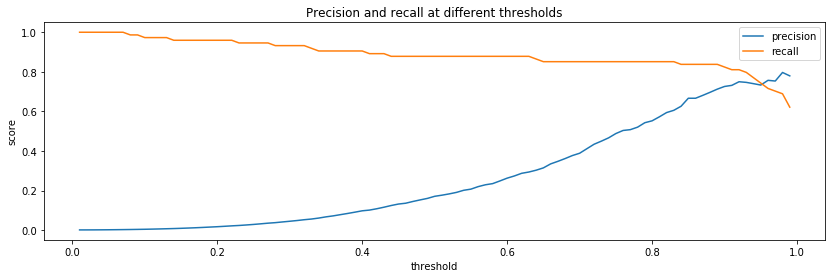

In [28]:
model.fit(X_train_, y_train_)
probs = model.predict_proba(X_val_)[:,1]

thresholds = np.array(range(1, 100))/100
precisions = []
recalls = []

for threshold in thresholds:
    result = [0 if prob < threshold else 1 for prob in probs]
    precisions.append(precision_score(y_val, result))
    recalls.append(recall_score(y_val, result))

plt.figure(figsize=(14, 4))
plt.plot(thresholds, precisions, label="precision")
plt.plot(thresholds, recalls, label="recall")
plt.title("Precision and recall at different thresholds")
plt.xlabel("threshold")
plt.ylabel("score")
plt.legend()
plt.show()

    

It seems the best threshold is about 0.83

In [29]:
threshold = 0.83

## Goodness of fit: How much data to train on

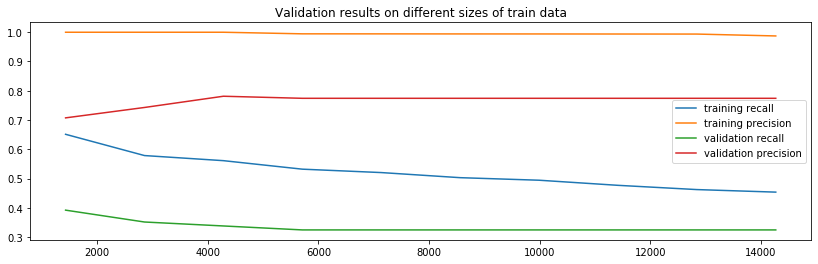

In [30]:
size_plot(model, X_train, X_val, y_train, y_val, MinMaxScaler(), threshold=threshold)

In this scenario I think all the data should be used.

## Holdout Validation
Now I will run the model on the test data which has yet to be seen by the model.

In [35]:
# run data on test set

# engineer data
X_train_, X_test_, y_train_, y_test_ = engineer(X_train, X_test, y_train, y_test)

# fit model to entire train set
model.fit(X_train_, y_train_)

# run model on test set
probs = model.predict_proba(X_test_)[:,1]

y_hat = [0 if prob < threshold else 1 for prob in probs]

# get results
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.69      0.77      0.73        74

    accuracy                           1.00     42722
   macro avg       0.84      0.88      0.86     42722
weighted avg       1.00      1.00      1.00     42722



The testing scores are %77 recall and %65 precision

# Precision Recall Curve
Now I will display the precision recall curve which shows all the posible precision and recall values possible if the model had different thresholds.

AUC: 0.7175747644527368


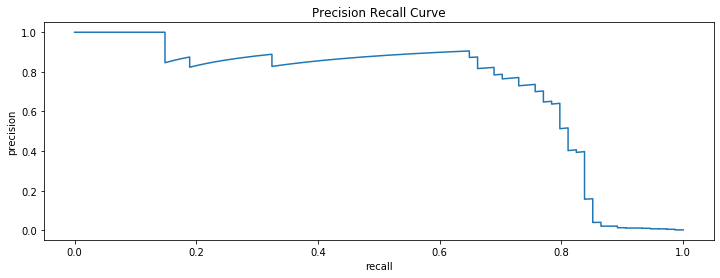

In [32]:
# Plot precision recall curve and the area under that curve.

# get precision, recall, and threshold values
p, r, th = precision_recall_curve(y_test_, probs)

# find and print AUC
print("AUC: {}".format(auc(r, p)))

# plot curve
plt.figure(figsize=(12, 4))
plt.plot(r, p)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision Recall Curve")
plt.show()

## Cross Validation

I will check the scores at each split of the model to make sure it is not over fitting to a specific split.

In [22]:
# print cross validation scores
customCV(model, X, y, StandardScaler(), SMOTE(), outlier_removal=False,
         pca=None, print_splits=True, threshold=threshold)

split 1
recall: 0.7879
precision: 0.3562
f1: 0.4906
precision-recall auc: 0.7639
split 2
recall: 0.9091
precision: 0.2961
f1: 0.4467
precision-recall auc: 0.8104
split 3
recall: 0.9184
precision: 0.3285
f1: 0.4839
precision-recall auc: 0.8483
split 4
recall: 0.8878
precision: 0.3283
f1: 0.4793
precision-recall auc: 0.8477
split 5
recall: 0.8571
precision: 0.3853
f1: 0.5316
precision-recall auc: 0.8217
Mean Scores:
Mean recall: 0.872
Mean precision: 0.3389
Mean f1: 0.4864
Mean auc: 0.8184 



[0.8720470006184291,
 0.3388614312270294,
 0.48641430842854466,
 0.8183981365747759]

It appears to not be overfitting to a particular split. <br>
The Cross validated scores are %87 recall and %34 precision

## Save Data

Now I will save the data along with a string to represent the transformations done to the data

In [23]:
pickle_out = open("Models/LogReg.pickle", "wb")
pickle.dump([model, 's1_r1_o1, pca None'], pickle_out)
pickle_out.close()